In [1]:
import generator

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# No outliers

In [3]:
data = [generator.generate_step(t=t, period=24, amplitude=100, error=20, mean=200) for t in range(24*7)]

In [4]:
df = pd.DataFrame(data={
    'x': range(24*7),
    'ds': pd.date_range(start="now", periods=24*7, freq='1h'),
    'y': data
})

In [5]:
df

,x,ds,y
0,0,2022-06-22 14:07:58.456207,202.001961
1,1,2022-06-22 15:07:58.456207,231.873733
2,2,2022-06-22 16:07:58.456207,256.882686
3,3,2022-06-22 17:07:58.456207,274.225746
4,4,2022-06-22 18:07:58.456207,300.708334
...,...,...,...
163,163,2022-06-29 09:07:58.456207,119.822863
164,164,2022-06-29 10:07:58.456207,125.062873
165,165,2022-06-29 11:07:58.456207,135.952926
166,166,2022-06-29 12:07:58.456207,161.073075


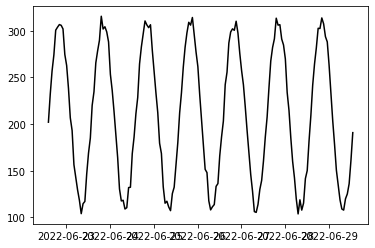

In [6]:
plt.plot(df.ds, df.y, c="k")

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import tensorflow as tf

from alibi_detect.od import OutlierProphet
from alibi_detect.utils.fetching import fetch_detector
from alibi_detect.utils.saving import save_detector, load_detector

/Users/rui/.virtualenvs/rhose-experiments/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [8]:
od = OutlierProphet(threshold=.99)

In [9]:
od.fit(df[['ds', 'y']])

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Initial log joint probability = -6.40608
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       606.098   1.09367e-06       65.4535      0.4524      0.4524      133   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     163       606.102    5.9699e-08       54.2148      0.4642      0.4642      227   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/Users/rui/.virtualenvs/rhose-experiments/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [10]:
od_preds = od.predict(
    df,
    return_instance_score=True,
    return_forecast=True
)

/Users/rui/.virtualenvs/rhose-experiments/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/rui/.virtualenvs/rhose-experiments/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [11]:
df['outlier'] = od_preds['data']['is_outlier'].is_outlier

In [12]:
df['colour'] = df['outlier'].apply(lambda x: "k" if x==0 else "r")
df['label'] = df['outlier'].apply(lambda x: "Normal" if x==0 else "Anomaly")

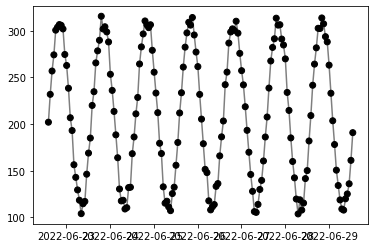

In [13]:
plt.plot(df.ds, df.y, alpha=0.5, c='k')
plt.scatter(df.ds, df.y, c=df.colour, label=df.colour)
plt.show()

# Outliers

In [14]:
anomaly_times=[10, 27, 83, 128]
for t in anomaly_times:
    data[t] *= 1.25

In [15]:
df = pd.DataFrame(data={
    'x': range(24*7),
    'ds': pd.date_range(start="now", periods=24*7, freq='1h'),
    'y': data
})

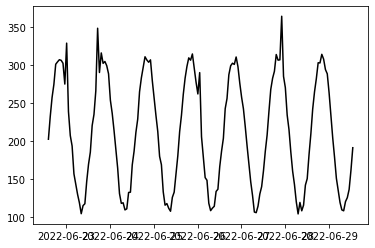

In [16]:
plt.plot(df.ds, df.y, c="k")

In [17]:
od = OutlierProphet(threshold=.95)

In [18]:
od.fit(df[['ds', 'y']])

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Initial log joint probability = -5.52177
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       507.826   2.99555e-05       84.3238      0.8473      0.8473      128   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     104        507.83   3.78202e-05       78.5882   4.321e-07       0.001      173  LS failed, Hessian reset 
     199       507.886   1.58891e-05        74.155       0.359           1      277   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     244       507.887   8.20106e-09       86.4183      0.3298      0.3298      337   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


/Users/rui/.virtualenvs/rhose-experiments/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [19]:
od_preds = od.predict(
    df,
    return_instance_score=True,
    return_forecast=True
)

/Users/rui/.virtualenvs/rhose-experiments/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/rui/.virtualenvs/rhose-experiments/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [20]:
df['outlier'] = od_preds['data']['is_outlier'].is_outlier
df['colour'] = df['outlier'].apply(lambda x: "k" if x==0 else "r")
df['label'] = df['outlier'].apply(lambda x: "Normal" if x==0 else "Anomaly")

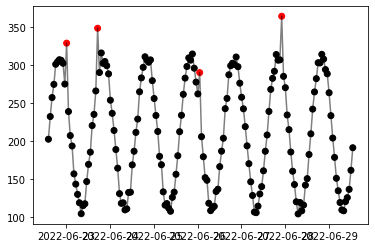

In [21]:
plt.plot(df.ds, df.y, alpha=0.5, c='k')
plt.scatter(df.ds, df.y, c=df.colour, label=df.colour)
plt.show()

In [22]:
from alibi_detect.utils.saving import save_detector

save_detector(detector=od, filepath="./model")

# Testing

In [34]:
now = pd.Timestamp.now()

In [35]:
result = od.predict(pd.DataFrame(data={"ds":[now], "y":[200]}))
result['data']['is_outlier']

/Users/rui/.virtualenvs/rhose-experiments/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/rui/.virtualenvs/rhose-experiments/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


,ds,is_outlier
0,2022-06-22 14:14:22.665710,0


In [36]:
result = od.predict(pd.DataFrame(data={"ds":[now], "y":[250]}))
result['data']['is_outlier']

/Users/rui/.virtualenvs/rhose-experiments/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/rui/.virtualenvs/rhose-experiments/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


,ds,is_outlier
0,2022-06-22 14:14:22.665710,1
